<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-и-описание-данных" data-toc-modified-id="Анализ-и-описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ и описание данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез-и-пояснения" data-toc-modified-id="Проверка-гипотез-и-пояснения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез и пояснения</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы-'Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются'" data-toc-modified-id="Проверка-гипотезы-'Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются'-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка гипотезы 'Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются'</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Проверка-гипотезы-'Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов'" data-toc-modified-id="Проверка-гипотезы-'Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов'-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверка гипотезы 'Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов'</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

## Изучение данных из файла

In [1]:
import pandas as pd, numpy as np #импортируем библиотеки pandas
from scipy import stats as st

pd.set_option('precision', 3) #установим количество выводимых цифр для вещественных чисел

df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [2]:
#объединим в список все таблицы
df = [df_calls, df_internet, df_messages, df_tariffs, df_users]

#в цмкле получим необходимую информацию по каждой таблице
for i in range(len(df)):
    df[i].info() #получим общую информацию о данных
    print(df[i].describe()) #получим также разброс значений, максимум, минимум, среднее и медиану
    print("Duplicates:", df[i].duplicated().sum()) #посчитаем количество дубликатов
    display(df[i].head()) #получим первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
         duration     user_id
count  202607.000  202607.000
mean        6.756    1253.941
std         5.843     144.723
min         0.000    1000.000
25%         1.300    1126.000
50%         6.000    1260.000
75%        10.700    1379.000
max        38.000    1499.000
Duplicates: 0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
       Unnamed: 0     mb_used     user_id
count  149396.000  149396.000  149396.000
mean    74697.500     370.192    1252.100
std     43127.055     278.301     144.051
min         0.000       0.000    1000.000
25%     37348.750     138.188    1130.000
50%     74697.500     348.015    1251.000
75%    112046.250     559.553    1380.000
max    149395.000    1724.830    1499.000
Duplicates: 0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
          user_id
count  123036.000
mean     1256.989
std       143.524
min      1000.000
25%      1134.000
50%      1271.000
75%      1381.000
max      1499.000
Duplicates: 0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
       messages_included  mb_per_month_included  minutes_included  \
count              2.000                   2.00             2.000   
mean             525.000               23040.00          1750.000   
std              671.751               10861.16          1767.767   
min               50.000               15360.00           5

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
        user_id      age
count   500.000  500.000
mean   1249.500   46.588
std     144.482   16.668
min    1000.000   18.000
25%    1124.750   32.000
50%    1249.500   46.000
75%    1374.250   62.000
max    1499.000   75.000
Duplicates: 0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод

Согласно документации к данным:
    
Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Типы данных в столбцах — object, int64, float64.
    
В столбцах с датами тип данных указан object.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Дублирующихся значений нет.

Чтобы двигаться дальше, нужно устранить эти проблемы.

## Подготовка данных

### Объединение данных

Необходимо объединить данные для удобства выполнения дальнейшей обработки и расчетов.
Для этого сперва заменим в столбцах call_date, session_date, message_date тип oblect на datetime64 в таблицах df_calls, df_internet, df_messages.

In [3]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') #заменим тип object на datetime64

In [4]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d') #заменим тип object на datetime64

In [5]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d') #заменим тип object на datetime64

Затем в этих же таблицах выделим столбец month с помощью метода dt.month.

In [6]:
df_calls['month'] = df_calls['call_date'].dt.month

In [7]:
df_internet['month'] = df_internet['session_date'].dt.month

In [8]:
df_messages['month'] = df_messages['message_date'].dt.month

Так как «Мегалайн» всегда округляет секунды до минут, т.е каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута, сперва округлим данные.

Затем сгруппируем таблицу df_calls по id пользователя и месяцу, найдем количество и продолжительность совершенных звонков.

In [9]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('Int64')

In [10]:
calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc={'sum', 'count'}).reset_index()
calls_pivot.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
calls_pivot

,user_id,month,calls_count,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


Сгруппируем таблицу df_internet также по id пользователя и месяцу, найдем количество использованного трафика.

In [11]:
internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_pivot

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Сгруппируем таблицу df_messages также по id пользователя и месяцу, найдем количество отправленных сообщений.

In [12]:
messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_pivot.columns = ['user_id', 'month', 'messages_count']
messages_pivot

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Изменим в таблице df_tariffs название столбца tariff_name на tariff.

In [13]:
df_tariffs = df_tariffs.rename(columns = {"tariff_name": "tariff"})

Теперь объединим последовательно все таблицы с помощью метода merge.

In [22]:
print(messages_pivot.shape)
data = messages_pivot.merge(calls_pivot, on=['user_id', 'month'], how='outer')
print(data.shape)
data = data.merge(internet_pivot, on=['user_id', 'month'], how='outer')
print(data.shape)
data = data.merge(df_users, on='user_id', how='outer')
print(data.shape)
data = data.merge(df_tariffs, on='tariff', how='left')
print(data.shape)

(2717, 3)
(3213, 5)
(3214, 6)
(3216, 13)
(3216, 20)


In [23]:
data

,user_id,month,messages_count,calls_count,calls_duration,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,22,159,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,60.0,43,172,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,75.0,47,340,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,81.0,52,408,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,57.0,58,466,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1494,10.0,NaN,52,354,17767.24,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3212,1494,11.0,NaN,63,411,18052.45,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3213,1494,12.0,NaN,62,418,17621.21,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


### Изменение типов данных

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3214 non-null   float64
 2   messages_count         2717 non-null   float64
 3   calls_count            3174 non-null   object 
 4   calls_duration         3174 non-null   object 
 5   mb_used                3203 non-null   float64
 6   age                    3216 non-null   int64  
 7   churn_date             189 non-null    object 
 8   city                   3216 non-null   object 
 9   first_name             3216 non-null   object 
 10  last_name              3216 non-null   object 
 11  reg_date               3216 non-null   object 
 12  tariff                 3216 non-null   object 
 13  messages_included      3216 non-null   int64  
 14  mb_per_month_included  3216 non-null   int64  
 15  minu

В столбцах reg_date, churn_date тип object заменим на datetime64.

In [25]:
data['reg_date'] = pd.to_datetime(data['reg_date'], format='%Y-%m-%d') #заменим тип object на datetime64

In [26]:
data['churn_date'] = pd.to_datetime(data['churn_date'], format='%Y-%m-%d') #заменим тип object на datetime64

В столбцах calls_duration, messages_count, month, calls_count заменим тип float64 на int64.

In [27]:
data['messages_count'] = data['messages_count'].astype('Int64')

In [28]:
data['month'] = data['month'].astype('Int64')

In [29]:
data['calls_count'] = data['calls_count'].astype('Int64')

In [30]:
data['calls_duration'] = data['calls_duration'].astype('Int64')

В столбцах mb_per_month_included, mb_used превратим мб в гб, разделив значение на 1024. Также заменим тип float64 на int64.

In [31]:
data['mb_per_month_included'] = (data['mb_per_month_included'] / 1024).astype('Int64')

In [32]:
data['mb_used'] = np.ceil(data['mb_used'] / 1024).astype('Int64')

Переименуем столбцы mb_per_month_included, mb_used соответственно в gb_per_month_included и gb_used.

In [33]:
data = data.rename(columns = {"mb_per_month_included": "gb_per_month_included", "mb_used": "gb_used"})

In [34]:
data

,user_id,month,messages_count,calls_count,calls_duration,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,22,159,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,60,43,172,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,75,47,340,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8,81,52,408,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9,57,58,466,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1494,10,<NA>,52,354,18,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,50,15,500,550,200,3,3
3212,1494,11,<NA>,63,411,18,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,50,15,500,550,200,3,3
3213,1494,12,<NA>,62,418,18,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,50,15,500,550,200,3,3
3214,1128,<NA>,<NA>,<NA>,<NA>,<NA>,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30,3000,1950,150,1,1


Напишем функцию для расчета помесячной выручки с каждого пользователя.

In [35]:
def calc_price(used_count, included_count, rub_per):
    price = 0
    if pd.isna(used_count):
        price = 0
    elif used_count > included_count:
        price = (used_count - included_count) * rub_per
    return price


def get_revenue(row):
    calls_price = calc_price(row['calls_duration'], row['minutes_included'], row['rub_per_minute'])
    messages_price = calc_price(row['messages_count'], row['messages_included'], row['rub_per_message'])
    gb_price = calc_price(row['gb_used'], row['gb_per_month_included'], row['rub_per_gb'])
    return row['rub_monthly_fee'] + calls_price + messages_price + gb_price

data['revenue'] = data.apply(get_revenue, axis=1)

In [36]:
data

,user_id,month,messages_count,calls_count,calls_duration,gb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,22,22,159,3,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,60,43,172,23,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,75,47,340,14,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,81,52,408,14,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,57,58,466,15,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1494,10,<NA>,52,354,18,62,NaT,Омск,Ренат,...,2018-08-17,smart,50,15,500,550,200,3,3,1150
3212,1494,11,<NA>,63,411,18,62,NaT,Омск,Ренат,...,2018-08-17,smart,50,15,500,550,200,3,3,1150
3213,1494,12,<NA>,62,418,18,62,NaT,Омск,Ренат,...,2018-08-17,smart,50,15,500,550,200,3,3,1150
3214,1128,<NA>,<NA>,<NA>,<NA>,<NA>,51,2018-12-23,Волжский,Ксения,...,2018-12-15,ultra,1000,30,3000,1950,150,1,1,1950


### Вывод

Посчитали и добавили в таблицу: количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам. После этого объединили таблицы в одну для удобства.

Также привели столбцы churn_date, reg_date к типу datetime64. Заменили вещественный тип на целочисленный в столбцах messages_count, month, calls_count, mb_per_month_included для уменьшения потребления памяти, также в столбцах calls_duration, mb_used предварительно округлив в большую сторону в связи с тем, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт.

Затем посчитали помесячную выручку с каждого пользователя.

Пропуски в столбцах churn_date, month, calls_count, calls_duration, gb_used, messages_count оставим как есть. Так как пропуски в столбцах с звонками с нулевой продолжительностью, с количеством звонков, говорят о том, что звонки не были совершены. И пропуски в столбцах с трафиком, месяцем и количеством сообщений, говорят о том, что они не были использованы клиентом. Также если значение в столбце churn_date пропущено, то тариф ещё действовал на момент выгрузки данных.

## Анализ и описание данных

Опишем поведение клиентов оператора, исходя из выборки.

Для этого сперва напишем функцию для построения гистограмм.

In [37]:
def plot_hist(column, title, xlabel, ylabel):
    ax = (data.query('tariff == "ultra"')
        .plot(
            kind='hist',
            y=column,
            bins=100,
            histtype='step',
            linewidth=3,
            legend=True,
            label='ultra'
            )
        )

    (data.query('tariff == "smart"')
    .plot(
        kind='hist',
        y=column,
        bins=100,
        ax=ax,
        alpha=0.5,
        legend=True,
        label='smart',
        title=title
        ).set(xlabel=xlabel, ylabel=ylabel)
    )

Используя функцию построим гистограмму продолжительности разговоров в месяц по каждому тарифу.

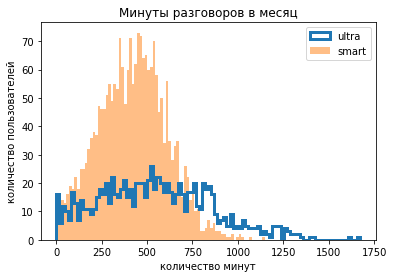

In [38]:
plot_hist('calls_duration', 'Минуты разговоров в месяц', 'количество минут', 'количество пользователей')

Также найдем среднее количество минут разговоров в месяц, стандартное отклонение и дисперсию.

In [39]:
data.pivot_table(index='tariff', values='calls_duration', aggfunc={'mean', 'var', 'std'}).reset_index()

,tariff,mean,std,var
0,smart,419.063,189.326,35844.19
1,ultra,545.451,306.926,94203.418


Используя функцию построим гистограмму израсходованного интернет-трафика в месяц по каждому тарифу.

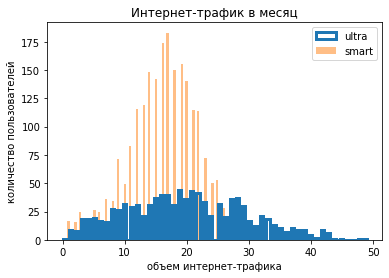

In [40]:
plot_hist('gb_used', 'Интернет-трафик в месяц', 'объем интернет-трафика', 'количество пользователей')

Также найдем средний объем интернет-трафика в месяц, стандартное отклонение и дисперсию.

In [41]:
data.pivot_table(index='tariff', values='gb_used', aggfunc={'mean', 'var', 'std'}).reset_index()

,tariff,mean,std,var
0,smart,16.336,5.738,32.924
1,ultra,19.694,9.703,94.147


Используя функцию построим гистограмму отправленного количества сообщений в месяц по каждому тарифу.

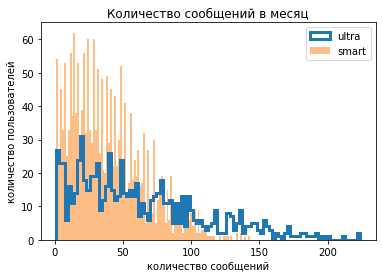

In [42]:
plot_hist('messages_count', 'Количество сообщений в месяц', 'количество сообщений', 'количество пользователей')

Также найдем среднее количество отправленных сообщений в месяц, стандартное отклонение и дисперсию.

In [43]:
data.pivot_table(index='tariff', values='messages_count', aggfunc={'mean', 'var', 'std'}).reset_index()

,tariff,mean,std,var
0,smart,38.716,26.788,717.594
1,ultra,61.161,45.931,2109.659


### Вывод

Итак, определили, что в среднем в месяц пользователям тарифа Смарт требуется 419 минут разговора, 16 Гб объем интернет-трафика и 39 сообщений. А пользователям тарифа Ультра требуется 545 минут разговора, 20 Гб объем интернет-трафика и 61 сообщений.

Стандартное отклонение у тарифа Смарт намного меньше, чем у тарифа Ультра, дисперсии не равны. Это говорит о том, что данные сосредоточены вокруг среднего значения (Смарт), а большое значение этих величин – о том, что данные разбросаны в широком диапазоне значений (Ультра). Также об этом утверждают гистограммы, на них мы видим сильную скошенность вправо у тарифа Ультра.

## Проверка гипотез и пояснения

### Проверка гипотезы 'Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются'

Сгруппируем таблицу по выручке и найдем среднюю выручку, дисперсию и количество.

In [44]:
data.pivot_table(index='tariff', values='revenue', aggfunc={'mean', 'var', 'count'}).reset_index()

,tariff,count,mean,var
0,smart,2230.0,1289.642,669730.764
1,ultra,986.0,2070.030,141387.715


Сформулируем нулевую гипотезу:
    
    H0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

Тогда в качестве альтернативной возьмем следующую двустороннюю гипотезу:
    
    H1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки гипотезы используем метод ttest_ind. Так как дисперсии не равны и размер выборок отличается, параметр equal_var выставим False.

In [45]:
smart_filtered = data.query('tariff == "smart"')['revenue']
ultra_filtered = data.query('tariff == "ultra"')['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(smart_filtered, ultra_filtered, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


### Вывод

При выбранном уровне значимости в 5% получили бесконечно малое значение p-value. Таким образом, нулевая гипотеза о равенстве средних отвергается: средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

### Проверка гипотезы 'Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов'

Сформулируем нулевую гипотезу:

H0 - Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

Тогда в качестве альтернативной возьмем следующую двустороннюю гипотезу:

H1 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сделаем срез таблицы по выручке с условием city == "Москва", найдем дисперсию и количество.

In [46]:
data.query('city == "Москва"')['revenue'].var()

565636.467011886

In [47]:
data.query('city == "Москва"')['revenue'].count()

611

Сделаем также срез таблицы по выручке с условием city != "Москва", найдем дисперсию и количество.

In [48]:
data.query('city != "Москва"')['revenue'].var()

654069.5749627769

In [49]:
data.query('city != "Москва"')['revenue'].count()

2605

Для проверки гипотезы используем метод ttest_ind. Так как дисперсии не равны и размеры выборок отличаюся, параметр equal_var выставим False.

In [50]:
filtered_msk = data.query('city == "Москва"')['revenue']
filtered_not_msk = data.query('city != "Москва"')['revenue']

print('Средняя выручка пользователей из Москвы:', filtered_msk.mean())
print('Средняя выручка пользователей из регионов:', filtered_not_msk.mean())

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(filtered_msk, filtered_not_msk, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя выручка пользователей из Москвы: 1546.7135842880523
Средняя выручка пользователей из регионов: 1524.7251439539348
p-значение: 0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


### Вывод

При выбранном уровне значимости в 5% получили значение p-value 0.38. Таким образом, нулевая гипотеза о равенстве средних не отвергается: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

Основная выручка по тарифу Ультра идет в виде ежемесячного платежа по тарифному плану. Так как в среднем количество минут разговора, объем израсходованного трафика и количество отправленных сообщений не выходят за рамки тарифного плана. И в среднем выходит примерно 2100 рублей. 

По тарифу Смарт выручка в среднем превышает абонентскую плату на 750 рублей и составляет примерно 1300 рублей.

Таким образом, средняя выручка по тарифу Смарт уступает выручке по тарифу Ультра примерно на 800 рублей. Но этот тариф востребованней среди пользователей (разница в количестве примерно 1300).

Исходя из результатов, тариф Смарт приносит больше выручки и является наиболее выгодным.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены ошибки в данных
- [x]  исправлены ошибки
- [x]  есть пояснение, какие ошибки обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  посчитано и добавлено в таблицу: количество отправленных сообщений по месяцам
- [x]  посчитано и добавлено в таблицу: объем израсходованного интернет-трафика по месяцам
- [x]  посчитано и добавлено в таблицу: помесячная выручка с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)
- [x]  выполнено задание: "Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения"
- [x]  проверена гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"
- [x]  проверена гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- [x]  есть пояснение формулировки нулевой и альтернативной гипотезы, выбора критерия для проверки гипотез и почему
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод